In [0]:
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt

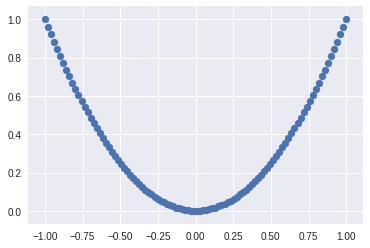

Variable containing:
-1.0000
-0.9798
-0.9596
-0.9394
-0.9192
[torch.FloatTensor of size 5x1]
 Variable containing:
 1.0000
 0.9600
 0.9208
 0.8825
 0.8449
[torch.FloatTensor of size 5x1]



In [37]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1) 
y = x.pow(2) 
x, y = Variable(x), Variable(y)

plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()
print x[:5],y[:5]

In [0]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      
        x = self.predict(x)             
        return x

In [13]:
net = Net(n_feature=1, n_hidden=10, n_output=1)     # define the network
print(net)  # net architecture

Net(
  (hidden): Linear(in_features=1, out_features=10)
  (predict): Linear(in_features=10, out_features=1)
)


In [0]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.5)
loss_func = torch.nn.MSELoss()

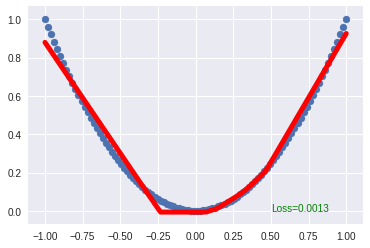

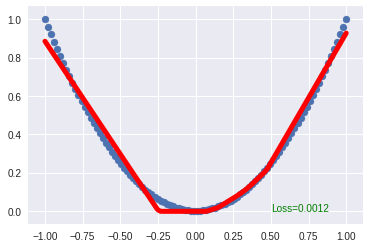

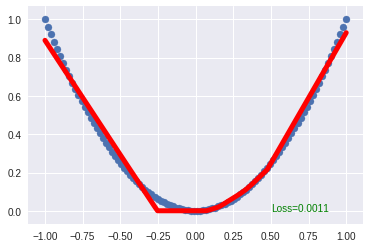

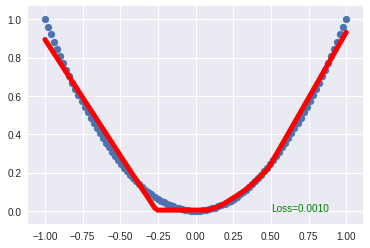

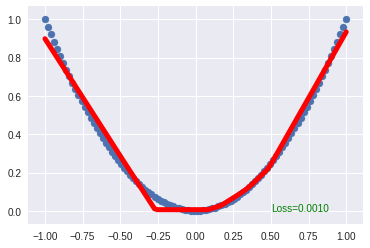

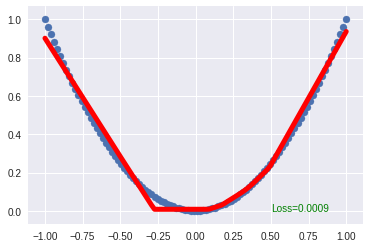

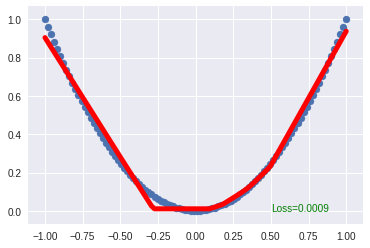

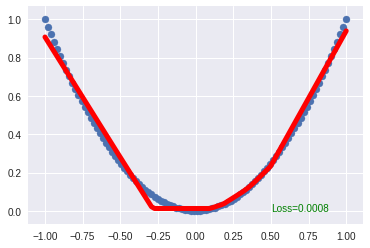

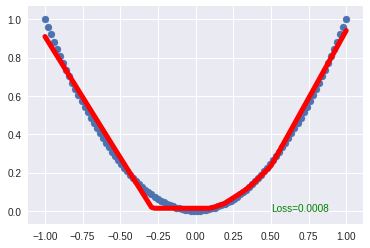

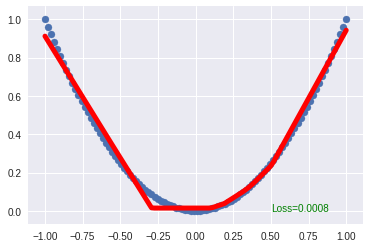

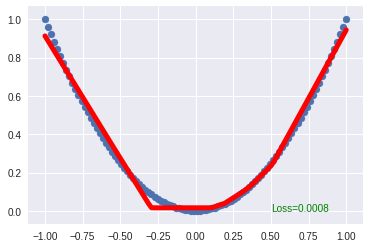

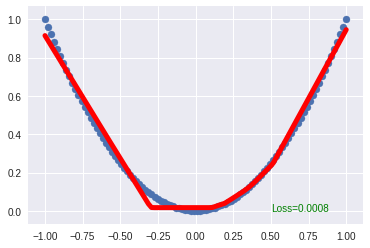

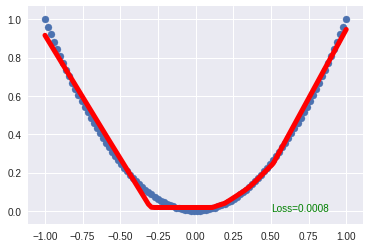

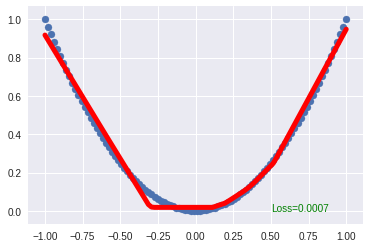

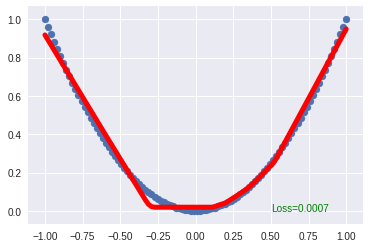

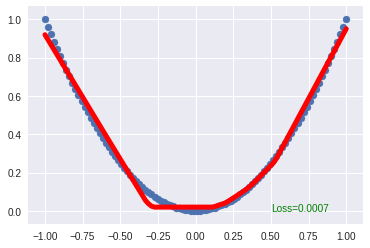

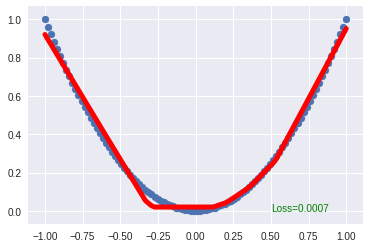

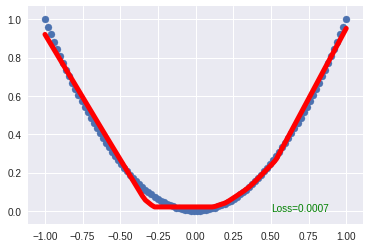

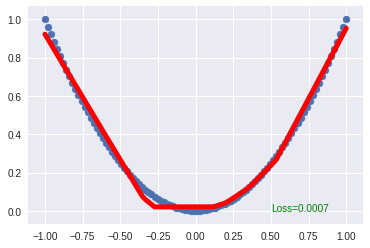

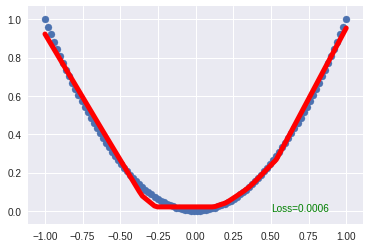

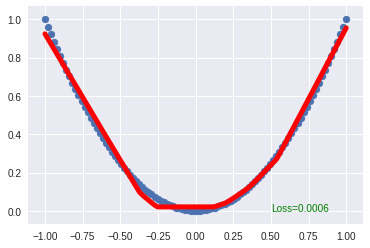

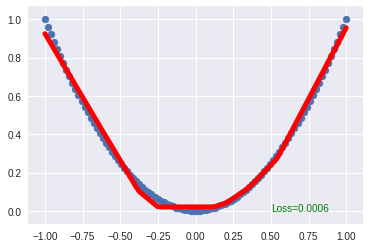

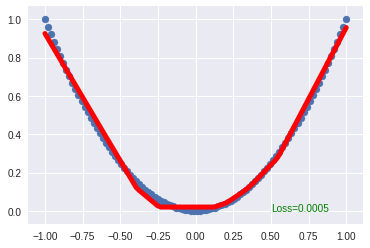

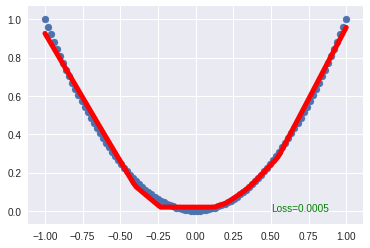

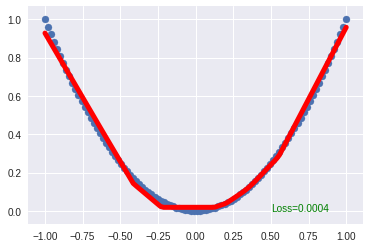

In [16]:
for t in range(250):
    prediction = net(x)     # input x and predict based on x

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 10 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data[0], fontdict={'size': 10, 'color':  'green'})
        plt.show()
        plt.pause(0.2)


In [17]:
torch.save(net, 'net.pkl')

/usr/local/lib/python2.7/dist-packages/torch/serialization.py:158: UserWarning: Couldn't retrieve source code for container of type Net. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [36]:
import numpy as np
net2 = torch.load('net.pkl')
x2=np.array([3,4,5,6])
x3=(torch.from_numpy(x2)).type(torch.FloatTensor)
x3=Variable(x3.view(-1,1))
print(x3)
prediction1 = net(x3)
print (prediction1)
prediction2 = net2(x3)
print (prediction2)

Variable containing:
 3
 4
 5
 6
[torch.FloatTensor of size 4x1]

Variable containing:
 3.9730
 5.4798
 6.9866
 8.4933
[torch.FloatTensor of size 4x1]

Variable containing:
 3.9730
 5.4798
 6.9866
 8.4933
[torch.FloatTensor of size 4x1]

